# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [190]:
#Customer_Churn.csv

In [215]:
#let import necessary libraries
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [216]:
df=pd.read_csv('Customer_Churn.csv')

In [217]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [218]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA Process:
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [219]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observations:

    1.Major Feature columns are object data type.
    
    2.total Charges as seems in dataframe is float but here it shows object datatype,which means     some string values are present,which we have to clean.
    

In [296]:
df.shape

(7032, 20)

Observations:

    1.Shape of our Dataframe is 7032 x 20;which means 7032 rows and 20 columns.

In [221]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [222]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

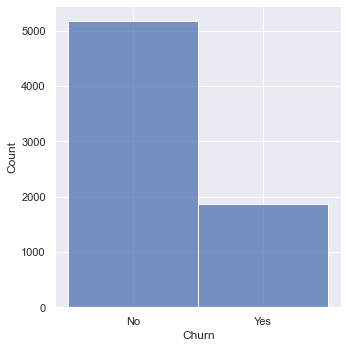

In [223]:
sns.displot(df['Churn'])

Observations:

1.As seen from above distribution plot that Churn feature column are not equally distributed,Hence we have to use imbalance learn for data balancing.



In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [225]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

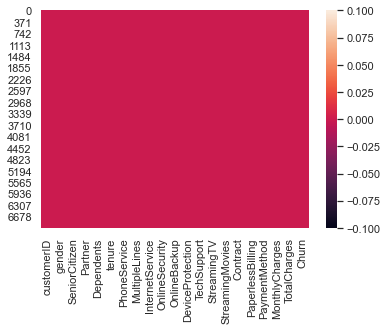

In [226]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:

1.As seen from above heatmap plot that feature column having no-nan values..

In [228]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4943,4973-MGTON,Female,0,Yes,No,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.40,5969.3,No
945,6680-WKXRZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),74.40,215.8,Yes
966,4541-RMRLG,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.25,112.3,Yes


# Drop some non related feature Columns:

In [229]:
df=df.drop(['customerID'], axis=1)

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

Male      3549
Female    3483
Name: gender, dtype: int64

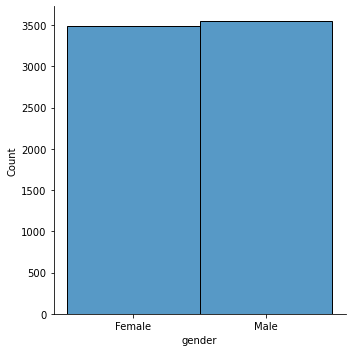

In [22]:
sns.displot(df['gender'])
df.gender.value_counts()

Observations:
    
    1.This feature column is distributed normally.

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

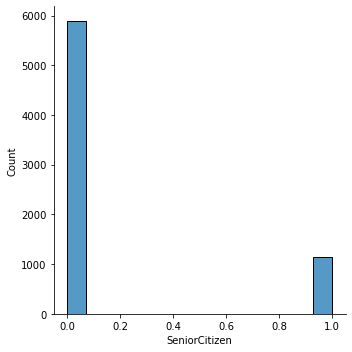

In [23]:
sns.displot(df['SeniorCitizen'])
df.SeniorCitizen.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No     3639
Yes    3393
Name: Partner, dtype: int64

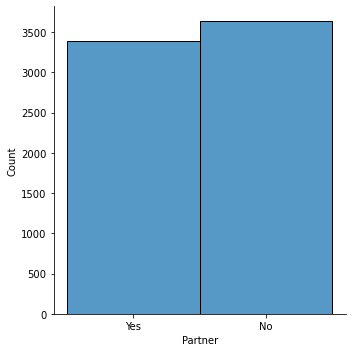

In [24]:
sns.displot(df['Partner'])
df.Partner.value_counts()

Observations:
    
    1.This feature column is distributed normally.

No     4933
Yes    2099
Name: Dependents, dtype: int64

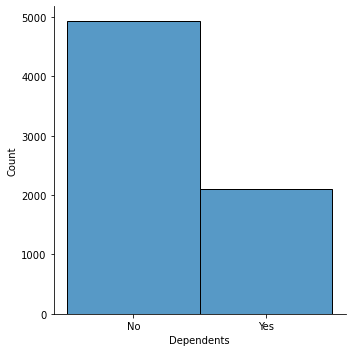

In [25]:
sns.displot(df['Dependents'])
df.Dependents.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

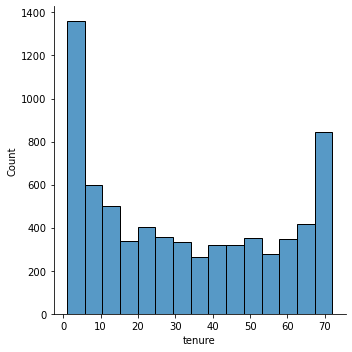

In [26]:
sns.displot(df['tenure'])
df.tenure.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

Yes    6352
No      680
Name: PhoneService, dtype: int64

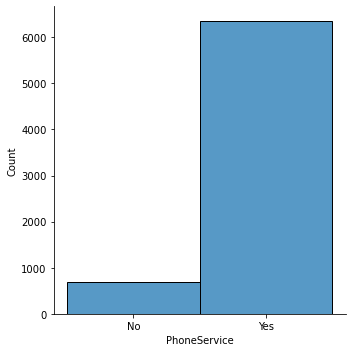

In [27]:
sns.displot(df['PhoneService'])
df.PhoneService.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

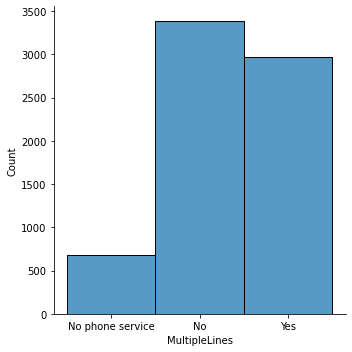

In [28]:
sns.displot(df['MultipleLines'])
df.MultipleLines.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

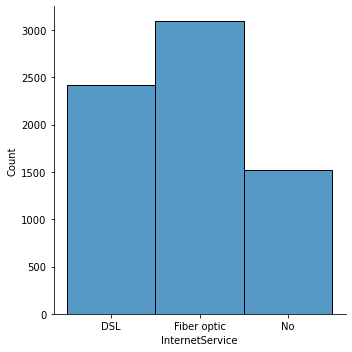

In [29]:
sns.displot(df['InternetService'])
df.InternetService.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

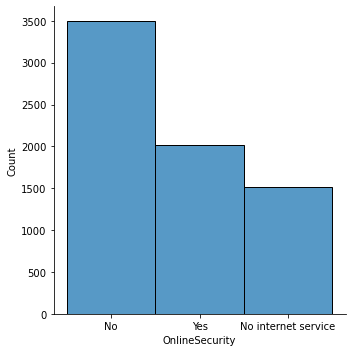

In [30]:
sns.displot(df['OnlineSecurity'])
df.OnlineSecurity.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

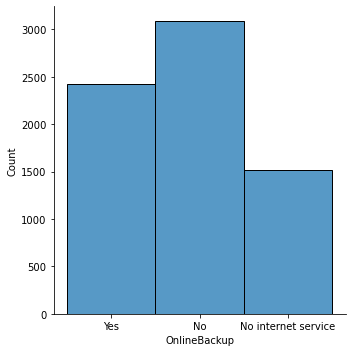

In [31]:
sns.displot(df['OnlineBackup'])
df.OnlineBackup.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

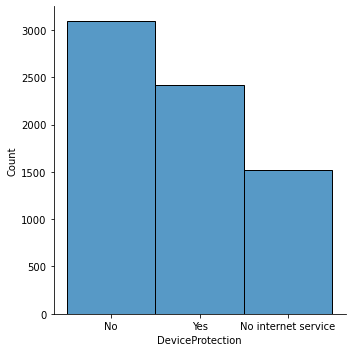

In [32]:
sns.displot(df['DeviceProtection'])
df.DeviceProtection.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

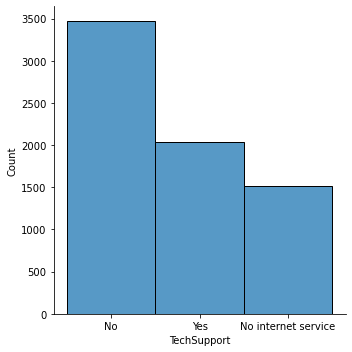

In [33]:
sns.displot(df['TechSupport'])
df.TechSupport.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

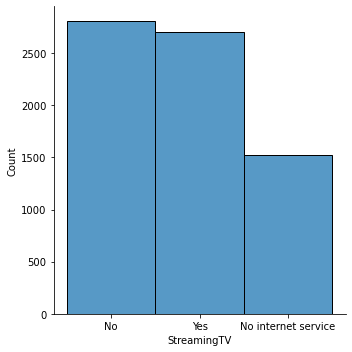

In [34]:
sns.displot(df['StreamingTV'])
df.StreamingTV.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

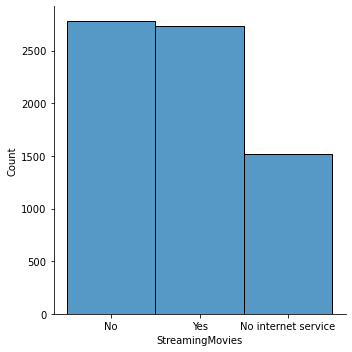

In [35]:
sns.displot(df['StreamingMovies'])
df.StreamingMovies.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

0    3875
2    1685
1    1472
Name: Contract, dtype: int64

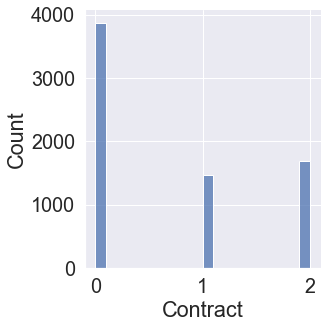

In [298]:
sns.displot(df['Contract'])
df.Contract.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

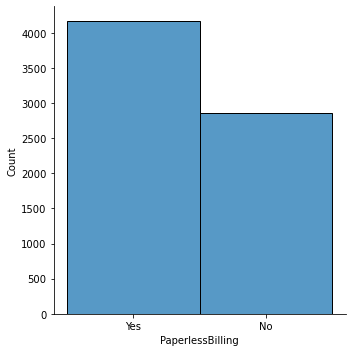

In [37]:
sns.displot(df['PaperlessBilling'])
df.PaperlessBilling.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

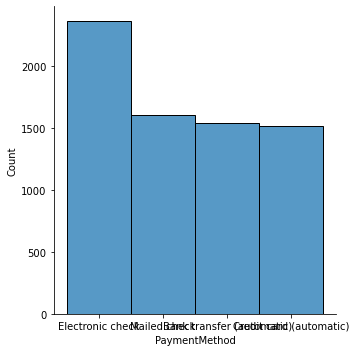

In [38]:
sns.displot(df['PaymentMethod'])
df.PaymentMethod.value_counts()

Observations:
    
    1.This feature column is distributed normally.

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

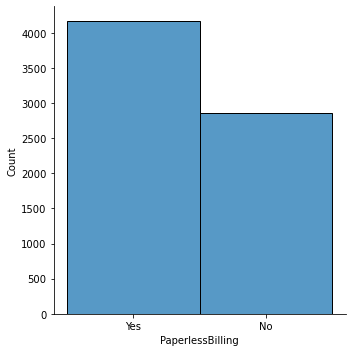

In [39]:
sns.displot(df['PaperlessBilling'])
df.PaperlessBilling.value_counts()

20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: MonthlyCharges, Length: 1584, dtype: int64

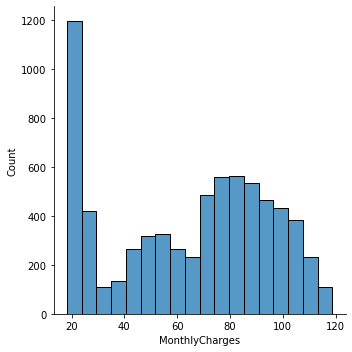

In [40]:
sns.displot(df['MonthlyCharges'])
df.MonthlyCharges.value_counts()

Observations:
    
    1.This feature column is not-distributed normally.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [230]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [231]:
x=df.drop(['MonthlyCharges','TotalCharges','tenure'], axis=1)

In [232]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [233]:
df1=x.apply(LabelEncoder().fit_transform)

In [234]:
df1['MonthlyCharges']=df.MonthlyCharges

In [235]:
df1['TotalCharges']=df.TotalCharges

In [236]:
df1['tenure']=df.tenure

In [237]:
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,29.85,1
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.5,34
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15,2
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,42.30,1840.75,45
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,84.80,1990.5,24
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,103.20,7362.9,72
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,29.60,346.45,11
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,74.40,306.6,4


In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   PhoneService      7043 non-null   int32  
 5   MultipleLines     7043 non-null   int32  
 6   InternetService   7043 non-null   int32  
 7   OnlineSecurity    7043 non-null   int32  
 8   OnlineBackup      7043 non-null   int32  
 9   DeviceProtection  7043 non-null   int32  
 10  TechSupport       7043 non-null   int32  
 11  StreamingTV       7043 non-null   int32  
 12  StreamingMovies   7043 non-null   int32  
 13  Contract          7043 non-null   int32  
 14  PaperlessBilling  7043 non-null   int32  
 15  PaymentMethod     7043 non-null   int32  
 16  Churn             7043 non-null   int32  


Observations:
    
    1.Total charges are object but it have to be float.

In [243]:
df1=df1.replace(r'^\s*$', np.nan, regex=True)
#lets replace string or empty data to nan values

# Drop Nan values Rows

In [244]:
# dropping the rows having NaN values
df1 = df1.dropna()
 
# To reset the indices
df1 = df1.reset_index(drop = True)
 
# Print the dataframe
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,29.85,1
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.5,34
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15,2
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,42.30,1840.75,45
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,84.80,1990.5,24
7028,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,103.20,7362.9,72
7029,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,29.60,346.45,11
7030,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,74.40,306.6,4


In [245]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float, errors = 'raise')

In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   PhoneService      7032 non-null   int32  
 5   MultipleLines     7032 non-null   int32  
 6   InternetService   7032 non-null   int32  
 7   OnlineSecurity    7032 non-null   int32  
 8   OnlineBackup      7032 non-null   int32  
 9   DeviceProtection  7032 non-null   int32  
 10  TechSupport       7032 non-null   int32  
 11  StreamingTV       7032 non-null   int32  
 12  StreamingMovies   7032 non-null   int32  
 13  Contract          7032 non-null   int32  
 14  PaperlessBilling  7032 non-null   int32  
 15  PaymentMethod     7032 non-null   int32  
 16  Churn             7032 non-null   int32  


Observations:
    
    1.Datatype of total charges is not processed and ready for futhere analysis..

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>],
       [<AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>],
       [<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <Ax

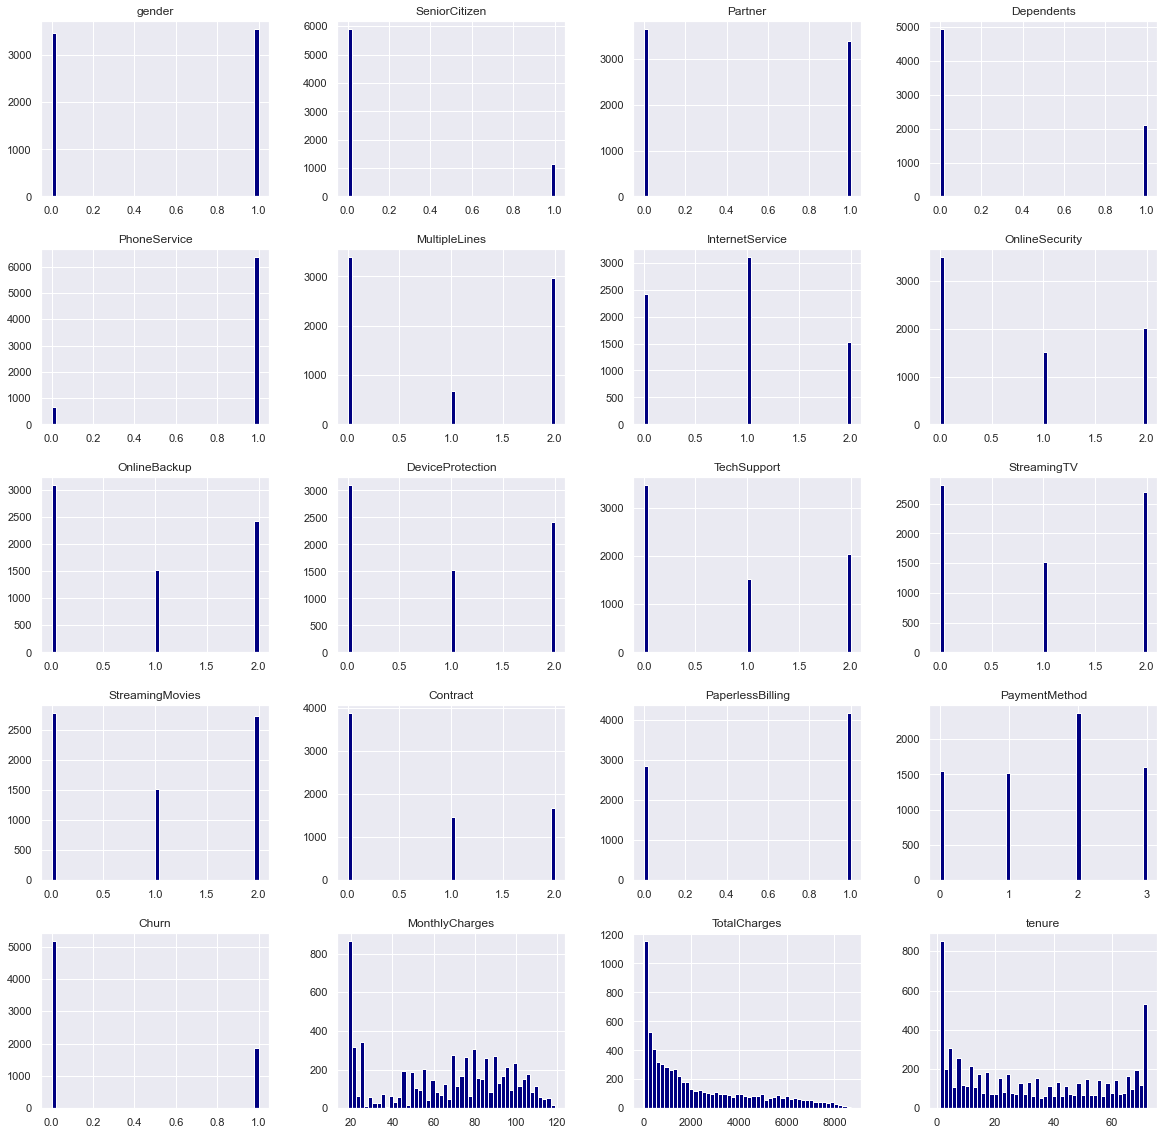

In [247]:
sns.set_style('dark')
df1.hist(bins=50,figsize=(20,20),color='navy')

Observations:
    
    1.After label encoding we see that data is not distributed normally , so we make data normal for better ML.

In [248]:
df=df1

# CORRELATION BETWEEN THE COLUMNS:

In [249]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.008545,-0.013779,0.000048,0.005285
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.150541,0.219874,0.102411,0.015683
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,-0.149982,0.097825,0.319072,0.381912
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.163128,-0.112343,0.064653,0.163386
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.011691,0.248033,0.113008,0.007877
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.038043,0.433905,0.453202,0.343673
InternetService,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.047097,-0.322173,-0.175691,-0.029835
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.289050,-0.053576,0.254473,0.327283
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,-0.195290,0.119943,0.375556,0.372434
DeviceProtection,0.001348,-0.021124,0.165614,0.079723,0.004718,0.122614,0.045558,0.175789,0.187646,1.000000,0.240476,0.275947,0.289309,0.350067,-0.037596,-0.136460,-0.177883,0.163984,0.389066,0.372669


In [250]:
df.corr().tail(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
PaymentMethod,0.016942,-0.038158,-0.156232,-0.041989,-0.005499,-0.176598,0.084504,-0.096593,-0.125534,-0.136460,-0.104544,-0.104782,-0.112009,-0.229636,-0.061348,1.000000,0.107852,-0.192500,-0.330594,-0.370087
Churn,-0.008545,0.150541,-0.149982,-0.163128,0.011691,0.038043,-0.047097,-0.289050,-0.195290,-0.177883,-0.282232,-0.036303,-0.038802,-0.396150,0.191454,0.107852,1.000000,0.192858,-0.199484,-0.354049
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.248033,0.433905,-0.322173,-0.053576,0.119943,0.163984,-0.008237,0.337156,0.335761,-0.072739,0.351930,-0.192500,0.192858,1.000000,0.651065,0.246862
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.113008,0.453202,-0.175691,0.254473,0.375556,0.389066,0.276890,0.392472,0.398088,0.450306,0.157830,-0.330594,-0.199484,0.651065,1.000000,0.825880
tenure,0.005285,0.015683,0.381912,0.163386,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,-0.354049,0.246862,0.825880,1.000000


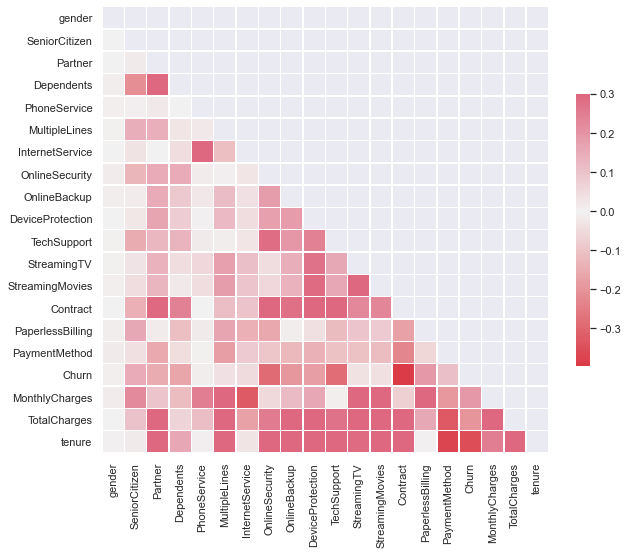

In [251]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

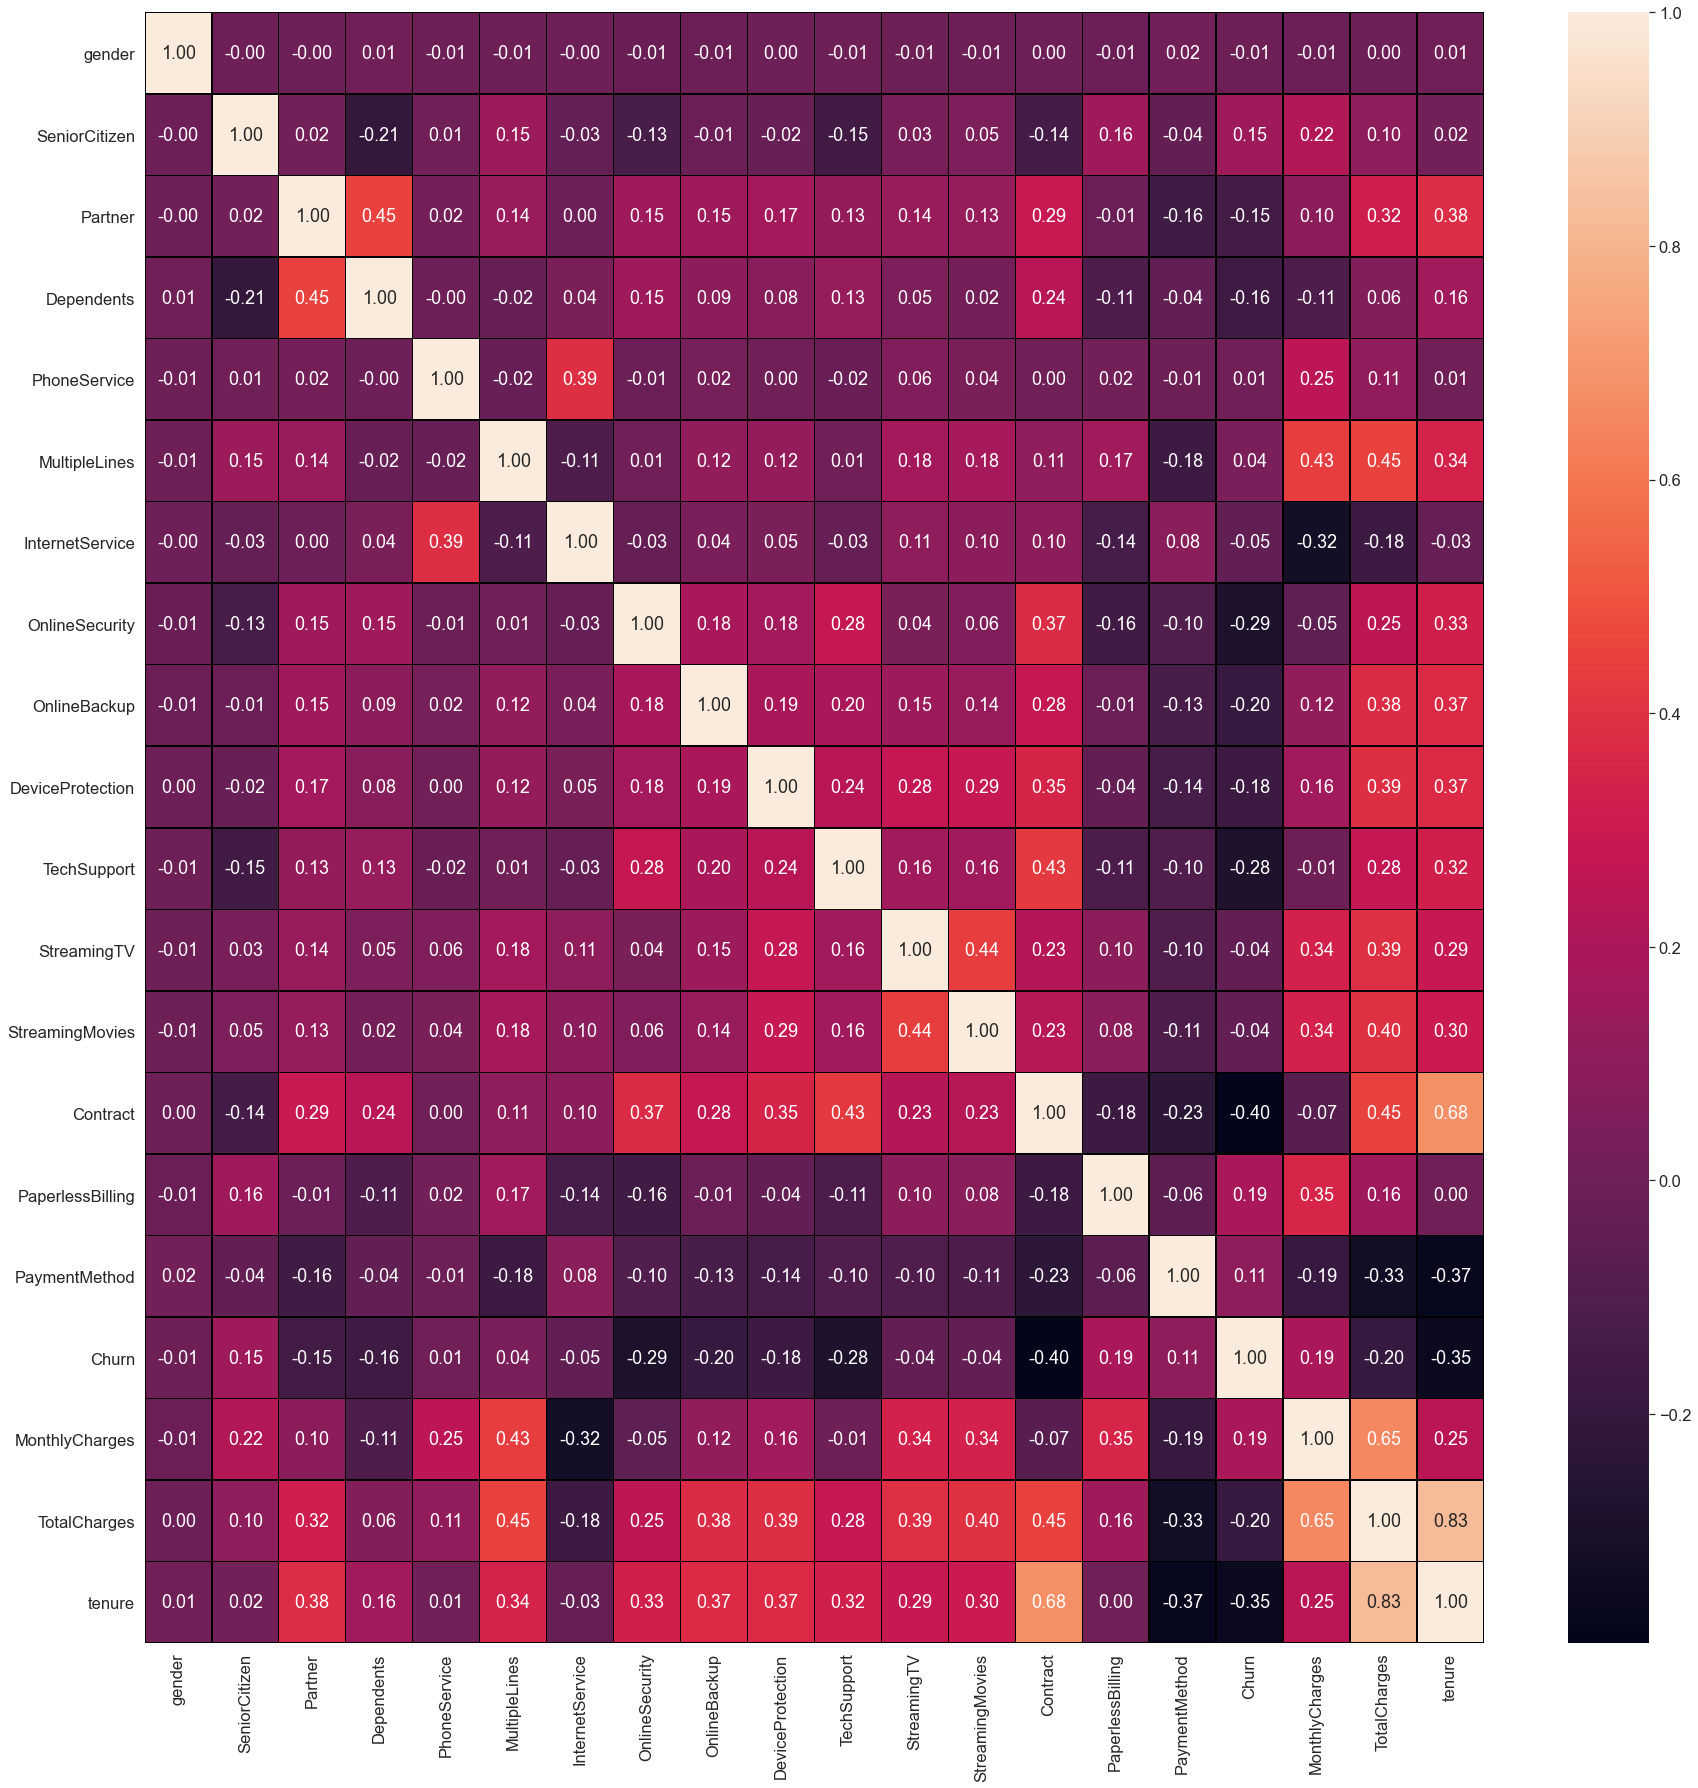

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observations:
    
    1.Feature columns are not much collinear.
    

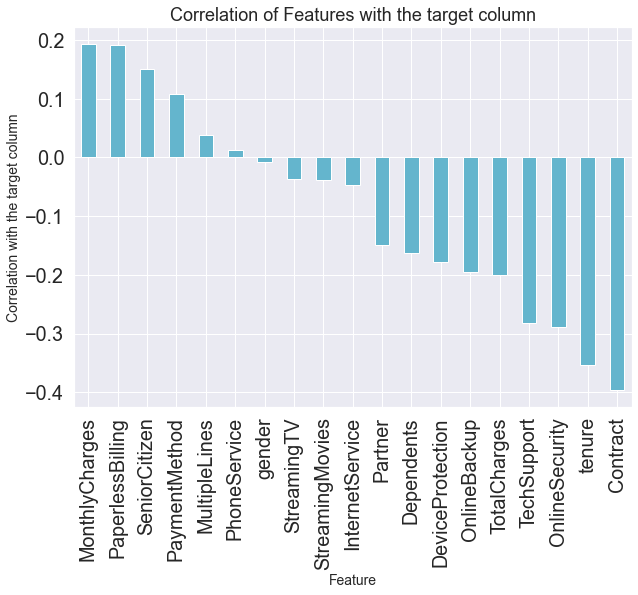

In [300]:
plt.figure(figsize=(10,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


observations:

    1.more than 50% of features columns are giving negative impact.
    
    2.Monthly charges,paperlessBilling , seniear citizen, payment method are the feature which impacts positive on churn.
    
    3.Contract and tenure is giving negative impact;means long contract makes customers stays with same company.
    
    
    


# Discription of dataset:

In [253]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,0.265785,64.798208,2283.300441,32.421786
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,0.441782,30.085974,2266.771362,24.545260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.587500,401.450000,9.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,70.350000,1397.475000,29.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,89.862500,3794.737500,55.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,118.750000,8684.800000,72.000000


# PLOTTING THE DISCRIPTION OF DATASET

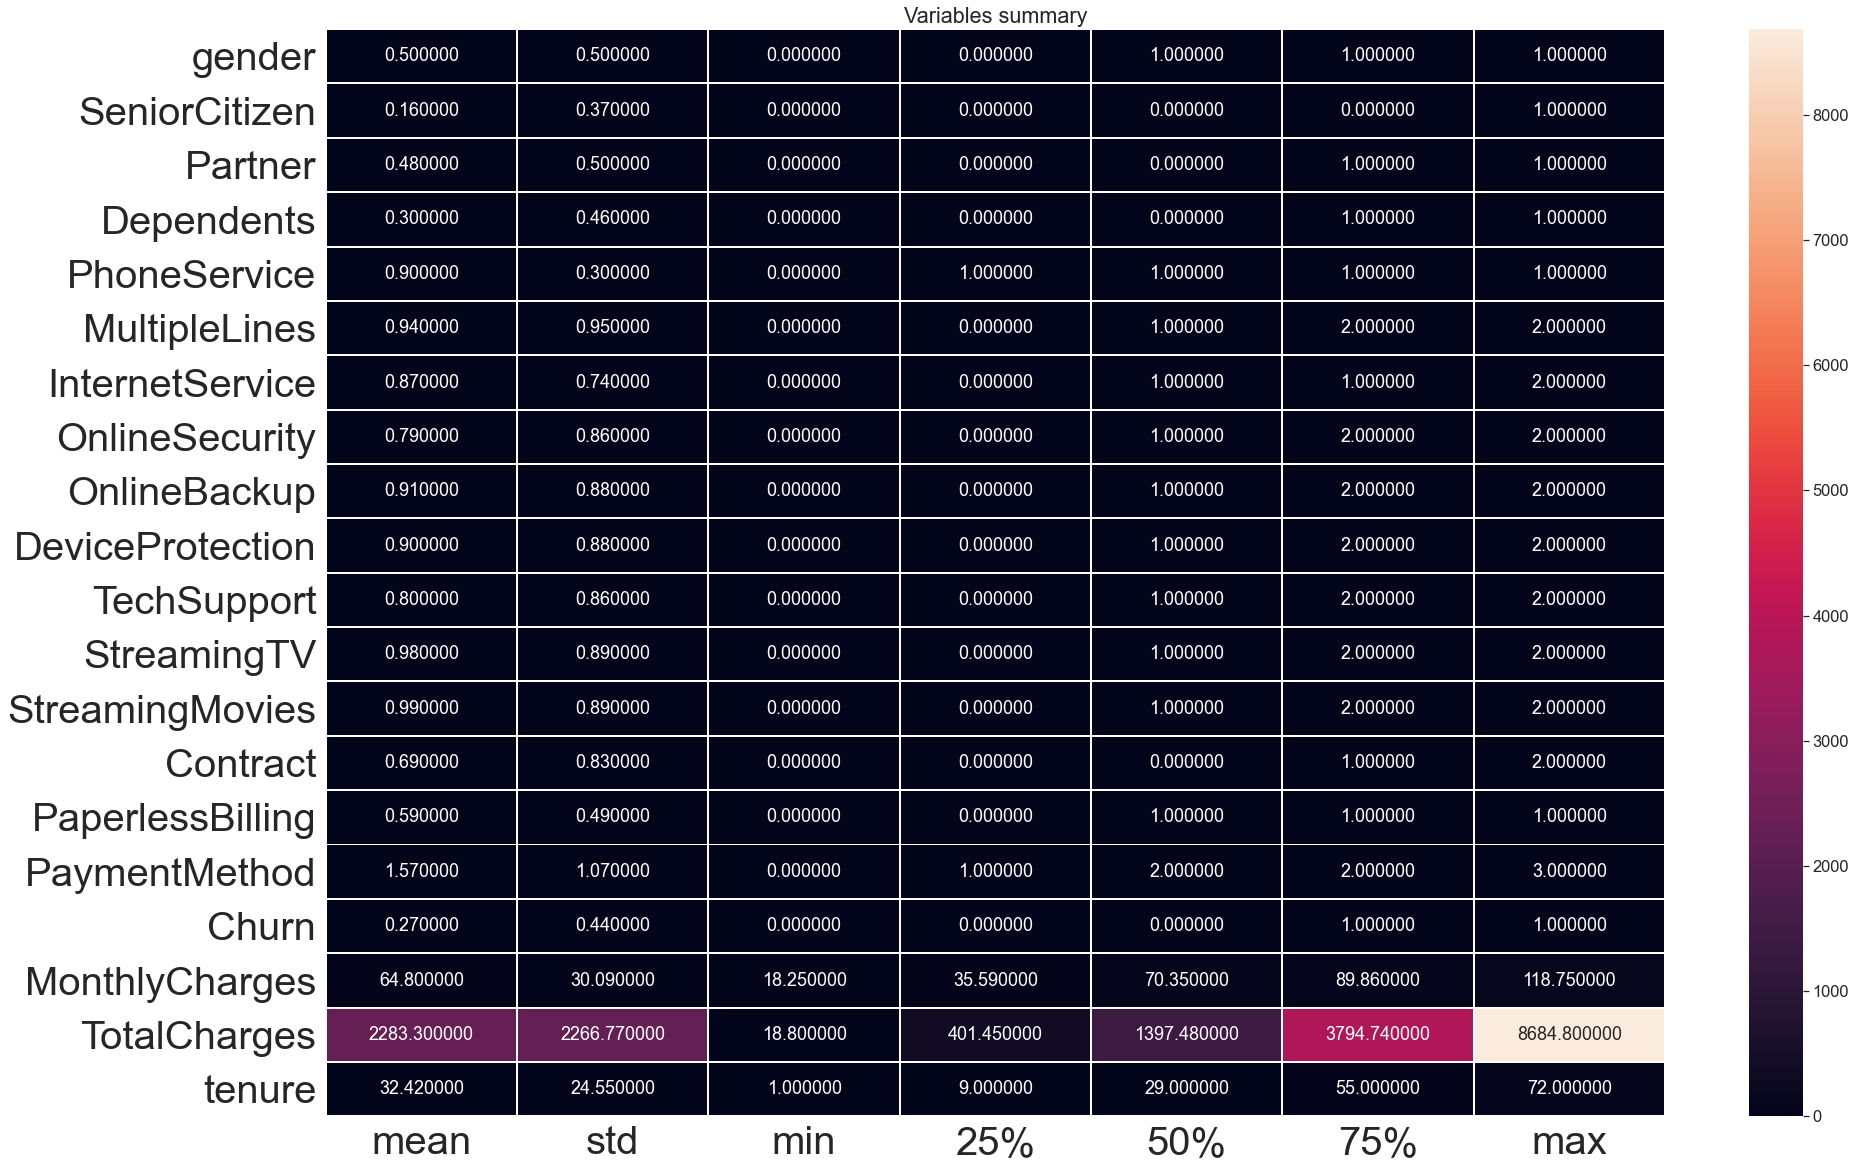

In [255]:
plt.figure(figsize=(30,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.set(font_scale=1.8)
plt.title("Variables summary")
plt.show()


Observations:
    
    1.From above plotting we can find mean,std,min,25%,50%,75% and max data of the following dataset.
    
    

# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [ ]:
#lets cheak the collinerity of the dataset.

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [257]:
x=df.drop('Churn', axis=1)

In [258]:
x.shape

(7032, 19)

In [259]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,34
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,2
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,45
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,24
7028,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,72
7029,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,11
7030,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,4


In [260]:
y=df["Churn"]

In [261]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

In [262]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [263]:
vif_calc()

    VIF Factor          features
0     1.954535            gender
1     1.369954     SeniorCitizen
2     2.819229           Partner
3     1.957360        Dependents
4    15.150758      PhoneService
5     2.756988     MultipleLines
6     4.350001   InternetService
7     2.247863    OnlineSecurity
8     2.455913      OnlineBackup
9     2.629892  DeviceProtection
10    2.381046       TechSupport
11    3.237958       StreamingTV
12    3.265595   StreamingMovies
13    4.194484          Contract
14    2.875010  PaperlessBilling
15    3.095143     PaymentMethod
16   20.503844    MonthlyCharges
17   13.869098      TotalCharges
18   15.084412            tenure


Observations:
    
    1. Data is not much collinear as vif of the columns are not that high.



# Cheak the skewness:

Now use subplot and displot to check data are normalised or not.

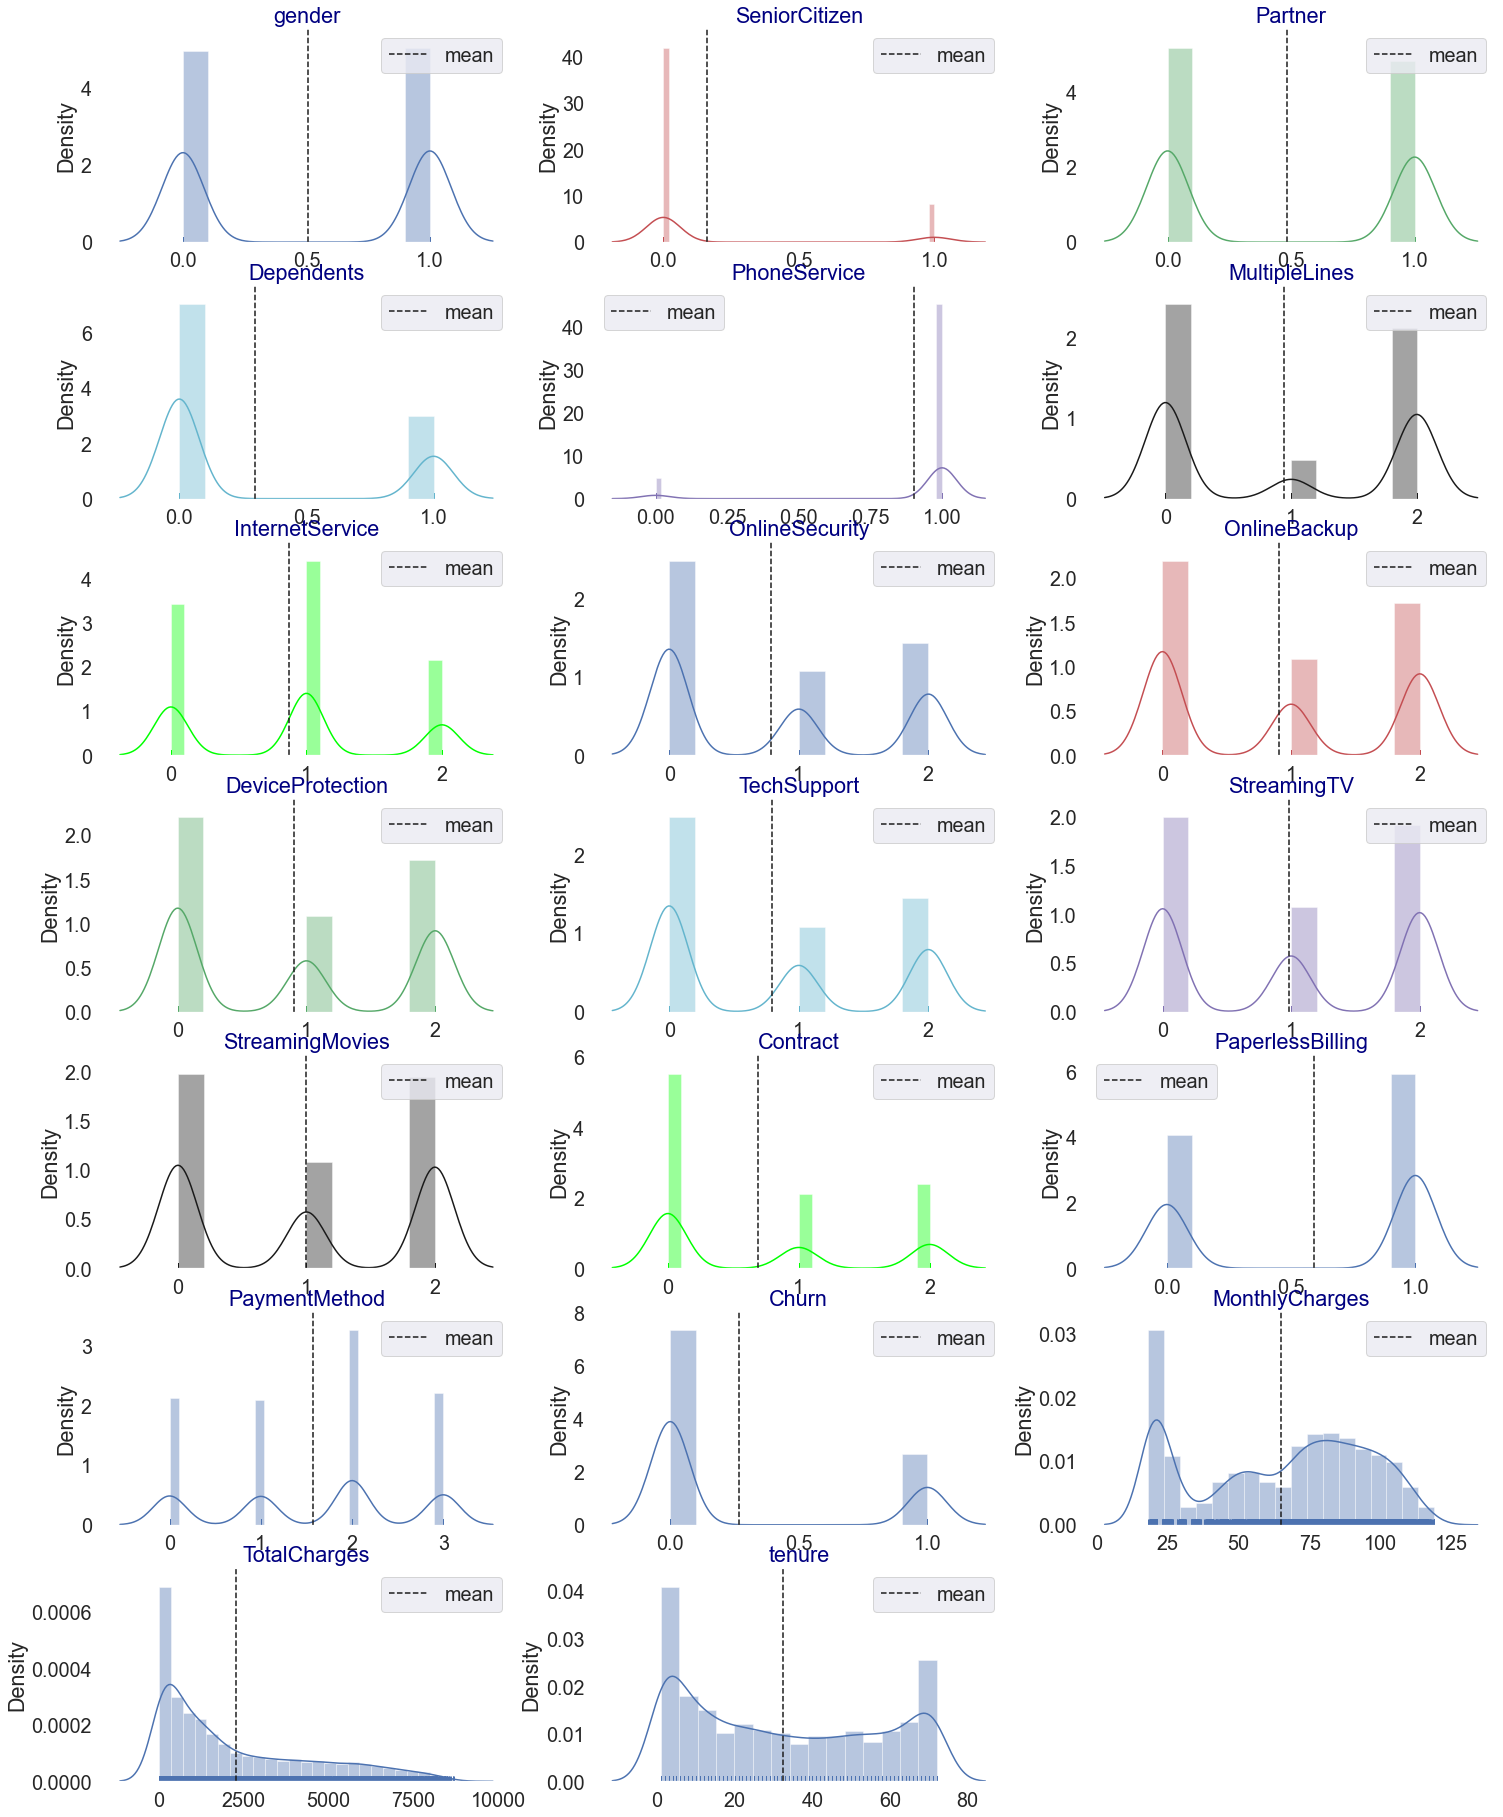

In [100]:
import itertools
import matplotlib.pyplot as plt
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'MonthlyCharges', 'TotalCharges', 'tenure']
length = len(cols)
cs = ["b","r","g","c","m","k",'lime',"b","r","g","c","m","k",'lime']
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(15,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [ ]:
Observations:
    
    1. data is not normalized.
    
    2.outliers are present as building blocks are out of the normal distribution curve.
    
    3. from above plotting data is skewed ;lets cheak the skewness.

In [101]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
Churn               1.060622
MonthlyCharges     -0.222103
TotalCharges        0.961642
tenure              0.237731
dtype: float64

Observations:
    
    1.data is skewed towards right.
    
    2.SeniorCitizen, total charges are highly skewed.

# Detecting outliers:

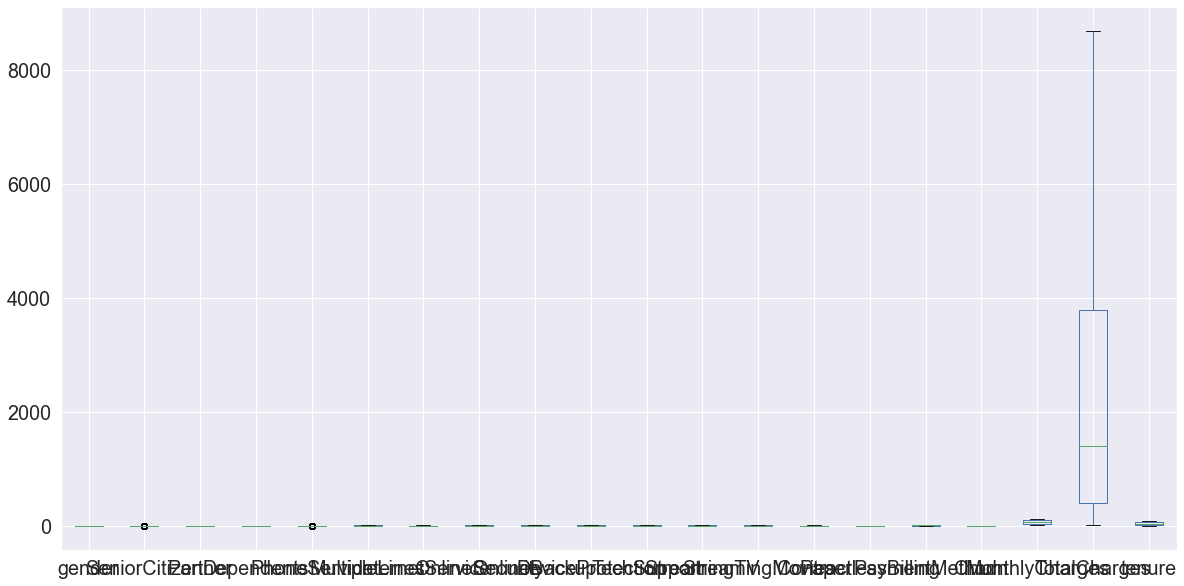

In [109]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1)

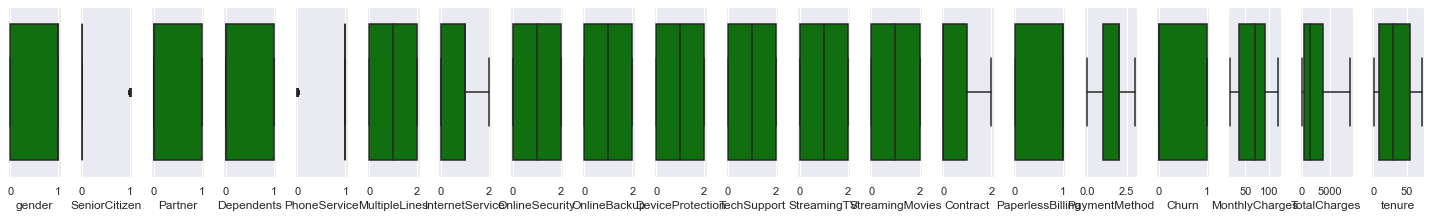

In [111]:
collist=df.columns.values
ncol=30
nrows=30
sns.set(font_scale=1)
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


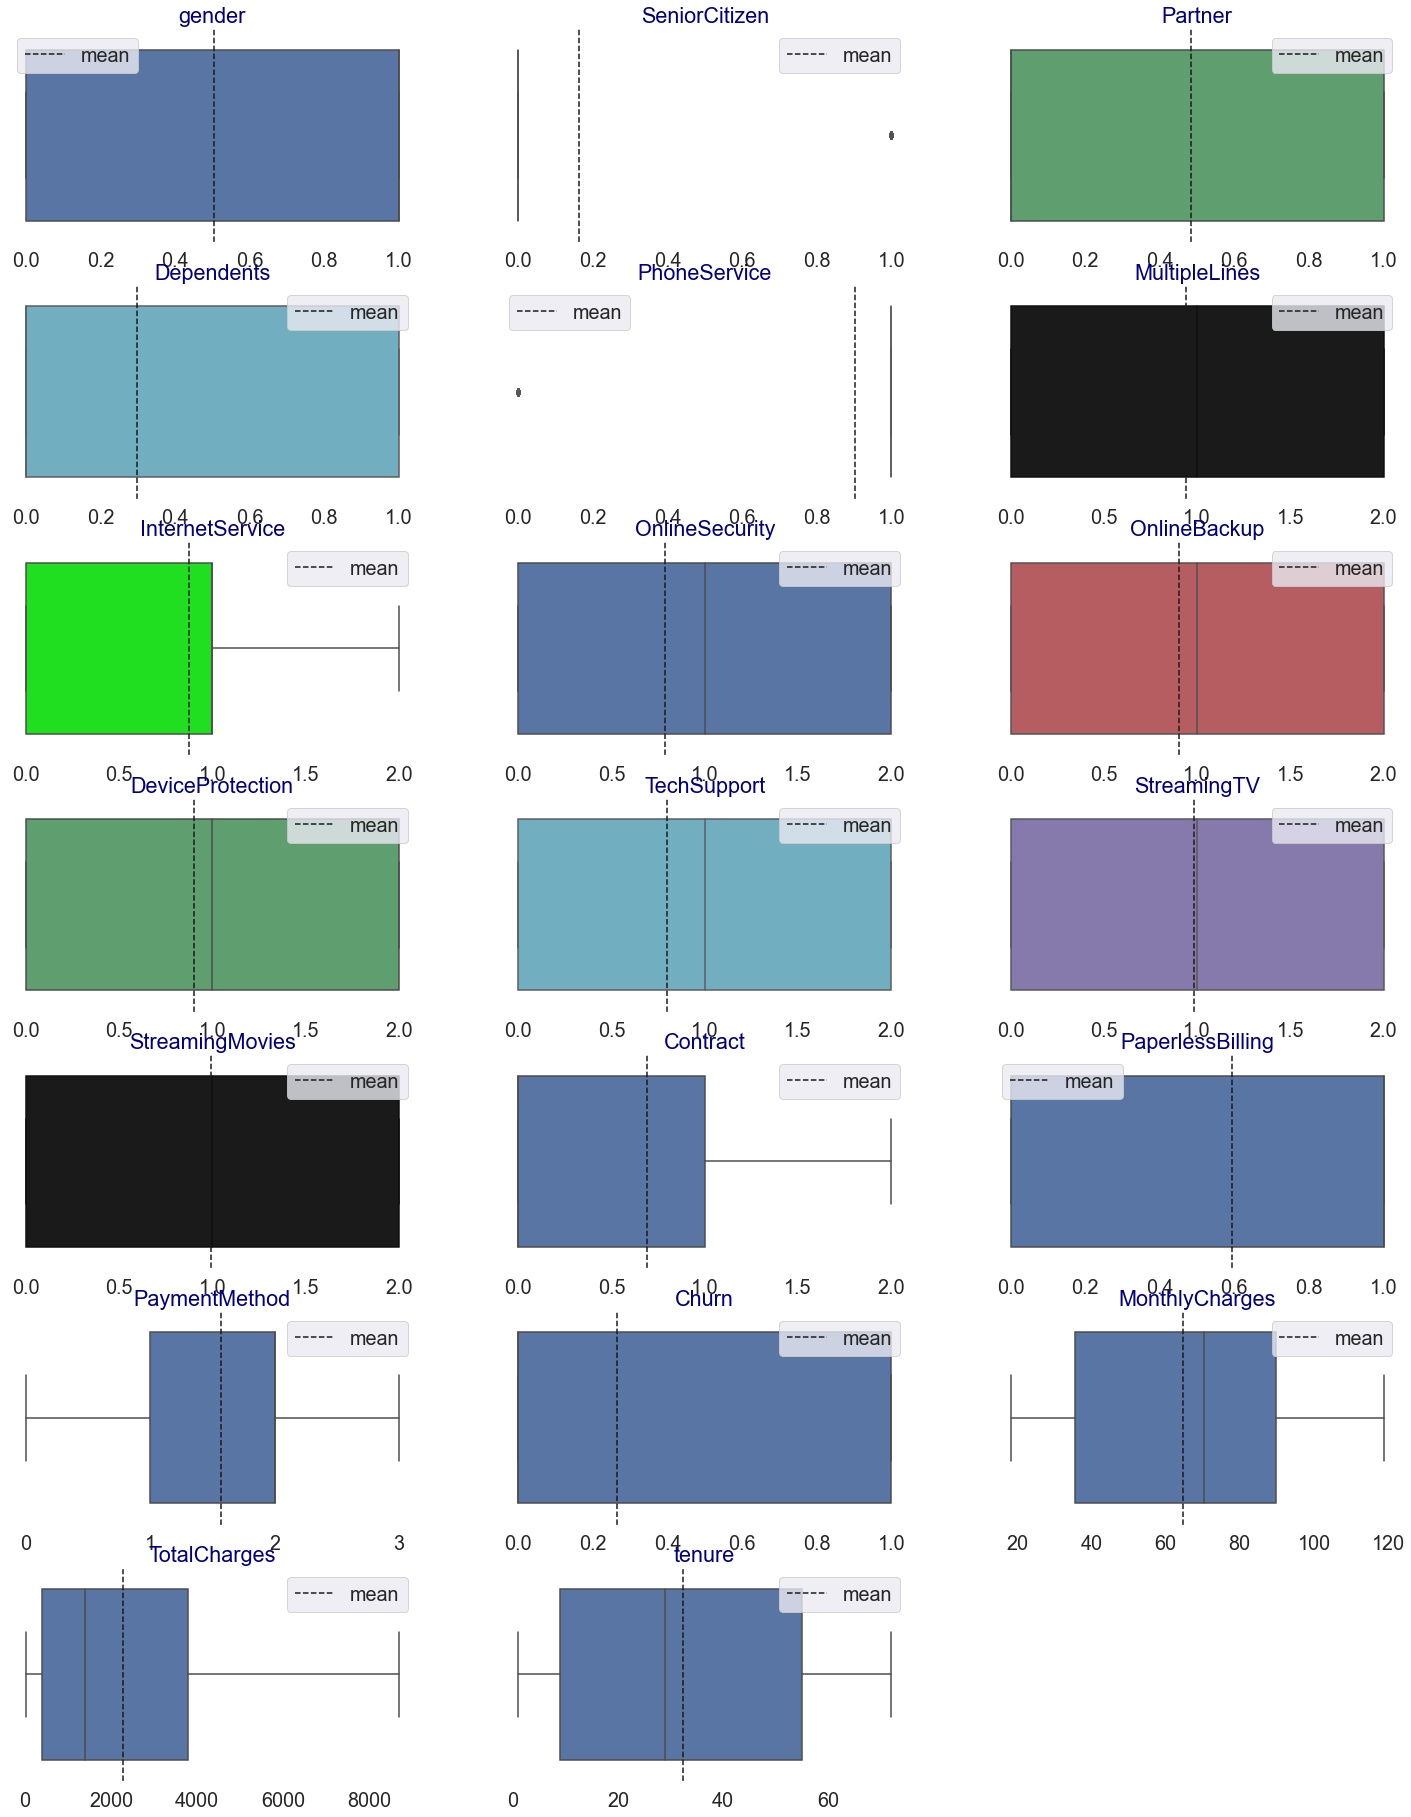

In [102]:
import itertools
import matplotlib.pyplot as plt
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'MonthlyCharges', 'TotalCharges', 'tenure']
length = len(cols)
cs = ["b","r","g","c","m","k",'lime',"b","r","g","c","m","k"]
fig = plt.figure(figsize=(25,70))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(15,3,j+1)
    ax = sns.boxplot(df1[i],color=k)
    ax.set_facecolor("w")
    plt.axvline(df1[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations:
    
    1. Some outliers are present in dataset.
    
    2.lets remove the outliers using z-score.

# Check the percentage of data falls under outliers:

In [265]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [266]:
df_new=df[(z<3).all(axis=1)]
df_new

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.50,34
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15,2
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,151.65,2
5,0,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1,99.65,820.50,8
6,1,0,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0,89.10,1949.40,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,0,0,0,0,1,0,2,1,1,1,1,1,1,2,1,0,0,21.15,1419.40,72
7027,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,84.80,1990.50,24
7028,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,103.20,7362.90,72
7030,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,74.40,306.60,4


In [267]:
df.shape

(7032, 20)

In [268]:
df_new.shape

(6352, 20)

In [269]:
percentage_loss=((7032-6352)/7032)*100
print(percentage_loss)

9.670079635949943


observations:
    
    1. As data loss is below 10%,we can proceed further. 

# Split the dataset in input columns and target columns..


In [270]:
y=df_new['Churn']

In [271]:
x=df_new.drop('Churn', axis=1)

# Removing skewness by transforming data.

In [272]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.99309687, -0.44196502, -0.9714404 , ..., -0.37521102,
         0.22327844,  0.29187112],
       [ 0.99309687, -0.44196502, -0.9714404 , ..., -0.47663799,
        -1.39984543, -1.50159774],
       [-1.00695111, -0.44196502, -0.9714404 , ...,  0.08287588,
        -1.26437932, -1.50159774],
       ...,
       [-1.00695111, -0.44196502,  1.02939923, ...,  1.20939012,
         1.52607251,  1.33979158],
       [ 0.99309687,  2.26262248,  1.02939923, ...,  0.20822944,
        -0.94105004, -1.27163468],
       [ 0.99309687, -0.44196502, -0.9714404 , ...,  1.29641414,
         1.44405291,  1.19902417]])

In [273]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.99309687, -0.44196502, -0.9714404 , ..., -0.37521102,
         0.22327844,  0.29187112],
       [ 0.99309687, -0.44196502, -0.9714404 , ..., -0.47663799,
        -1.39984543, -1.50159774],
       [-1.00695111, -0.44196502, -0.9714404 , ...,  0.08287588,
        -1.26437932, -1.50159774],
       ...,
       [-1.00695111, -0.44196502,  1.02939923, ...,  1.20939012,
         1.52607251,  1.33979158],
       [ 0.99309687,  2.26262248,  1.02939923, ...,  0.20822944,
        -0.94105004, -1.27163468],
       [ 0.99309687, -0.44196502, -0.9714404 , ...,  1.29641414,
         1.44405291,  1.19902417]])

# Since the column has binary variable we will use logistic classification model
Regressor Model Building:

Logistic Regression:

In [274]:
df_new.Churn.value_counts()

0    4653
1    1699
Name: Churn, dtype: int64

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [276]:
from imblearn.over_sampling import SMOTE

In [277]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [278]:
np.bincount(y)

array([4653, 1699], dtype=int64)

In [279]:
y_train.value_counts()

1    4653
0    4653
Name: Churn, dtype: int64

In [280]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 36  The model performs very well
At random_state:- 36
Training accuracy_score is:- 80.73213934264909
Testing accuracy_score is:- 80.72383949645948
At random state 42  The model performs very well
At random_state:- 42
Training accuracy_score is:- 80.65341468214918
Testing accuracy_score is:- 80.72383949645948
At random state 139  The model performs very well
At random_state:- 139
Training accuracy_score is:- 80.65341468214918
Testing accuracy_score is:- 80.72383949645948
At random state 148  The model performs very well
At random_state:- 148
Training accuracy_score is:- 80.63373351702421
Testing accuracy_score is:- 80.64516129032258
At random state 256  The model performs very well
At random_state:- 256
Training accuracy_score is:- 80.73213934264909
Testing accuracy_score is:- 80.72383949645948
At random state 258  The model performs very well
At random_state:- 258
Training accuracy_score is:- 80.79118283802401
Testing accuracy_score is:- 80.80251770259638
At random stat

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=443,test_size=0.20)

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=443,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8088119590873328

In [283]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.1911880409126672
Mean Squared Error: 0.1911880409126672
Root Mean Square Error: 0.4372505470696031


In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       955
           1       0.64      0.53      0.58       316

    accuracy                           0.81      1271
   macro avg       0.75      0.72      0.73      1271
weighted avg       0.80      0.81      0.80      1271



In [285]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 80.47858942065491
accuracy_score is :- 80.88119590873329


At cv:- 3
Cross validation score is :- 80.6675177293576
accuracy_score is :- 80.88119590873329


At cv:- 4
Cross validation score is :- 80.69899244332494
accuracy_score is :- 80.88119590873329


At cv:- 5
Cross validation score is :- 80.52573149048736
accuracy_score is :- 80.88119590873329


At cv:- 6
Cross validation score is :- 80.6044805736886
accuracy_score is :- 80.88119590873329


At cv:- 7
Cross validation score is :- 80.63589049022949
accuracy_score is :- 80.88119590873329


At cv:- 8
Cross validation score is :- 80.39987405541562
accuracy_score is :- 80.88119590873329


At cv:- 9
Cross validation score is :- 80.5416144853189
accuracy_score is :- 80.88119590873329




In [286]:
rscore=cross_val_score(lr,x,y,cv=4)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 80.5416144853189
accuracy_score is :- 80.88119590873329


In [287]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[859  96]
 [147 169]]
0.8088119590873328
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       955
           1       0.64      0.53      0.58       316

    accuracy                           0.81      1271
   macro avg       0.75      0.72      0.73      1271
weighted avg       0.80      0.81      0.80      1271



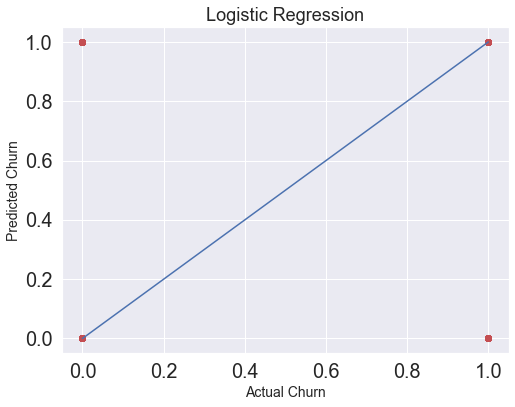

In [288]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Churn',fontsize=14)
plt.ylabel('Predicted Churn',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [139]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [141]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds = r2_score(y_test,pred_rd)
for j in range(2,10):
    rds = r2_score(y_test,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: -1.7273150302466345
Cross Val Score: 80.41561712846348
At cv:- 3
R2 Score: -1.7273150302466345
Cross Val Score: 80.03782946898238
At cv:- 4
R2 Score: -1.7273150302466345
Cross Val Score: 80.22670025188917
At cv:- 5
R2 Score: -1.7273150302466345
Cross Val Score: 80.11640657427655
At cv:- 6
R2 Score: -1.7273150302466345
Cross Val Score: 80.08500368611112
At cv:- 7
R2 Score: -1.7273150302466345
Cross Val Score: 79.9432322409509
At cv:- 8
R2 Score: -1.7273150302466345
Cross Val Score: 80.11649874055415
At cv:- 9
R2 Score: -1.7273150302466345
Cross Val Score: 80.0694039829716


In [142]:
rscore=cross_val_score(rd,x,y,cv=8)
print("Cross validation score is :-",rds*100)
print("accuracy_score is :-",rdc*100)

Cross validation score is :- -1.7273150302466345
accuracy_score is :- 80.0694039829716


In [143]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.20298977183320221
Mean Squared Error: 0.20298977183320221
Root Mean Square Error: 0.45054386227447624


In [144]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.7970102281667978
[[838  83]
 [175 175]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       921
           1       0.68      0.50      0.58       350

    accuracy                           0.80      1271
   macro avg       0.75      0.70      0.72      1271
weighted avg       0.79      0.80      0.79      1271



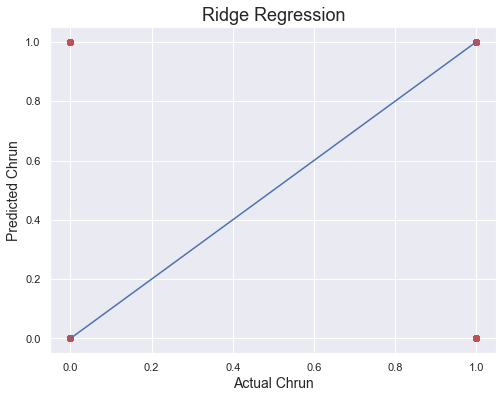

In [145]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Chrun',fontsize=14)
plt.ylabel('Predicted Chrun',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:¶
DecisionTreeClassifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [146]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features = 'log2')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(y_test,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)
    print(accuracy_score(y_test,pred_decision))

At cv:- 2
R2 Score: -35.24212812160697
Cross Val Score: 72.1662468513854
0.7301337529504327
At cv:- 3
R2 Score: -35.24212812160697
Cross Val Score: 73.6462430949659
0.7301337529504327
At cv:- 4
R2 Score: -35.24212812160697
Cross Val Score: 73.53589420654912
0.7301337529504327
At cv:- 5
R2 Score: -35.24212812160697
Cross Val Score: 72.84298432011498
0.7301337529504327
At cv:- 6
R2 Score: -35.24212812160697
Cross Val Score: 73.25235491627261
0.7301337529504327
At cv:- 7
R2 Score: -35.24212812160697
Cross Val Score: 73.53580951733355
0.7301337529504327
At cv:- 8
R2 Score: -35.24212812160697
Cross Val Score: 72.57556675062973
0.7301337529504327
At cv:- 9
R2 Score: -35.24212812160697
Cross Val Score: 73.2369624763091
0.7301337529504327


In [147]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.26986624704956724
Mean Squared Error: 0.26986624704956724
Root Mean Square Error: 0.5194865224907834


In [148]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7301337529504327
[[749 172]
 [171 179]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       921
           1       0.51      0.51      0.51       350

    accuracy                           0.73      1271
   macro avg       0.66      0.66      0.66      1271
weighted avg       0.73      0.73      0.73      1271



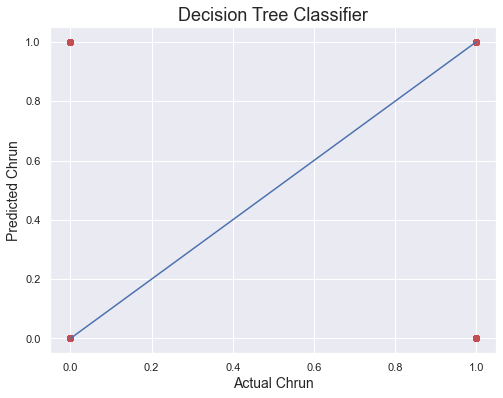

In [149]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Chrun',fontsize=14)
plt.ylabel('Predicted Chrun',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [152]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=100,max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(y_test,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: -3.6987746238560604
Cross Val Score: 78.44773299748111
At cv:- 3
R2 Score: -3.6987746238560604
Cross Val Score: 78.95151276988047
At cv:- 4
R2 Score: -3.6987746238560604
Cross Val Score: 79.03022670025189
At cv:- 5
R2 Score: -3.6987746238560604
Cross Val Score: 78.87268379414807
At cv:- 6
R2 Score: -3.6987746238560604
Cross Val Score: 78.99889505918306
At cv:- 7
R2 Score: -3.6987746238560604
Cross Val Score: 78.95153976865483
At cv:- 8
R2 Score: -3.6987746238560604
Cross Val Score: 79.15617128463477
At cv:- 9
R2 Score: -3.6987746238560604
Cross Val Score: 78.90444841804013


In [153]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))


Error:
Mean Absolute Error: 0.2069236821400472
Mean Squared Error: 0.2069236821400472
Root Mean Square Error: 0.4548886480668068


In [154]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.7930763178599528
[[824  97]
 [166 184]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       921
           1       0.65      0.53      0.58       350

    accuracy                           0.79      1271
   macro avg       0.74      0.71      0.72      1271
weighted avg       0.78      0.79      0.79      1271



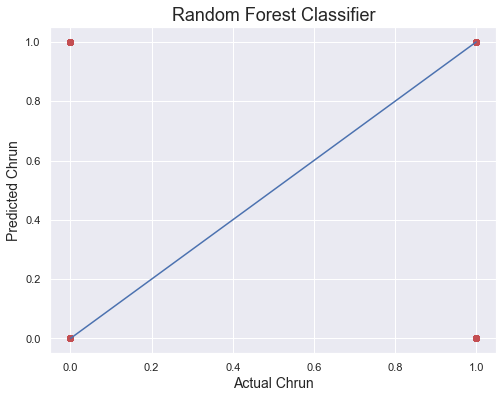

In [155]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Chrun',fontsize=14)
plt.ylabel('Predicted Chrun',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# Support Vector Classifier

In [156]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'rbf'}


In [159]:
sv = SVC(kernel='rbf',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)



svs = r2_score(y_test,pred_support)
for j in range(2,10):
    print("At cv:-",j)

    svs = r2_score(y_test,pred_support)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: -4.09306654257795
Cross Val Score: 79.53400503778339
At cv:- 3
R2 Score: -4.09306654257795
Cross Val Score: 79.89617154117136
At cv:- 4
R2 Score: -4.09306654257795
Cross Val Score: 79.97481108312343
At cv:- 5
R2 Score: -4.09306654257795
Cross Val Score: 79.95905016200278
At cv:- 6
R2 Score: -4.09306654257795
Cross Val Score: 79.94352425544423
At cv:- 7
R2 Score: -4.09306654257795
Cross Val Score: 79.72288119187661
At cv:- 8
R2 Score: -4.09306654257795
Cross Val Score: 79.94332493702771
At cv:- 9
R2 Score: -4.09306654257795
Cross Val Score: 79.94352136477386


In [160]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.2077104642014162
Mean Squared Error: 0.2077104642014162
Root Mean Square Error: 0.45575263488148504


In [161]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.7922895357985837
[[835  86]
 [178 172]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       921
           1       0.67      0.49      0.57       350

    accuracy                           0.79      1271
   macro avg       0.75      0.70      0.71      1271
weighted avg       0.78      0.79      0.78      1271



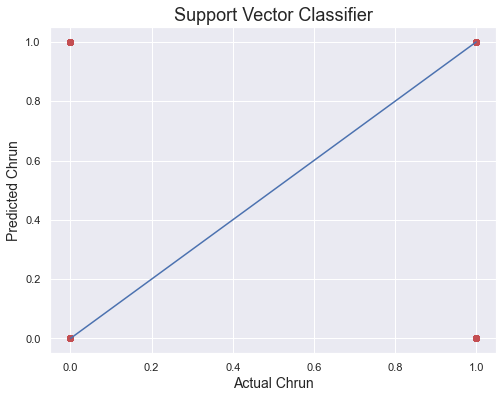

In [162]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Chrun',fontsize=14)
plt.ylabel('Predicted Chrun',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'uniform'}


In [163]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform',n_neighbors=25)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)


kns = r2_score(y_test,pred_k)
for j in range(2,10):
    print("At cv:-",j)

    kns = r2_score(y_test,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    knc = knscore.mean() 
    print('Cross Val Score:',knc*100)

At cv:- 2
R2 Score: -2.9101907864123033
Cross Val Score: 78.27455919395466
At cv:- 3
R2 Score: -2.9101907864123033
Cross Val Score: 78.4477294512742
At cv:- 4
R2 Score: -2.9101907864123033
Cross Val Score: 78.60516372795969
At cv:- 5
R2 Score: -2.9101907864123033
Cross Val Score: 78.76244757367563
At cv:- 6
R2 Score: -2.9101907864123033
Cross Val Score: 78.80976989027349
At cv:- 7
R2 Score: -2.9101907864123033
Cross Val Score: 78.55765554671275
At cv:- 8
R2 Score: -2.9101907864123033
Cross Val Score: 78.84130982367759
At cv:- 9
R2 Score: -2.9101907864123033
Cross Val Score: 78.52646570987841


In [164]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.2053501180173092
Mean Squared Error: 0.2053501180173092
Root Mean Square Error: 0.4531557326320712


In [165]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.7946498819826908
[[811 110]
 [151 199]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       921
           1       0.64      0.57      0.60       350

    accuracy                           0.79      1271
   macro avg       0.74      0.72      0.73      1271
weighted avg       0.79      0.79      0.79      1271



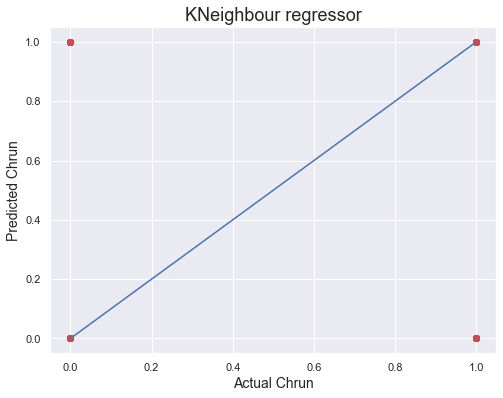

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_k, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Chrun',fontsize=14)
plt.ylabel('Predicted Chrun',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


# We tested 7 models out of which Logistic Regression performing good:


# plotting Auc-Roc curve..with logistic regression prediction.

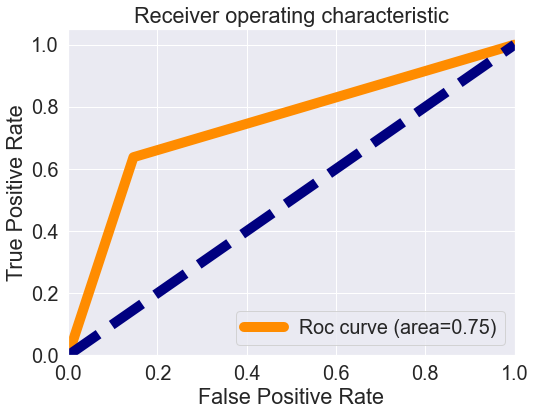

In [289]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

In [290]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, ..., 0, 0, 0])

In [291]:
predicted=np.array(pred_test)
predicted

array([0, 0, 1, ..., 1, 0, 0])

In [292]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
1266,0,0
1267,0,0
1268,0,1
1269,0,0


In [293]:
df_com.sample(10)

,original,predicted
1200,0,0
301,0,0
151,0,0
865,0,0
987,0,0
1081,0,0
904,1,0
1233,1,0
225,1,0
452,0,0


# The best model is Logistic regression as r2_score is best from above tested models.

In [294]:
rscore=cross_val_score(lr,x,y,cv=7)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 80.5416144853189
accuracy_score is :- 80.88119590873329


Our Model performs with Accuracy Score 80.88%.

# Saving the best models with initials...using pickle library

In [295]:
import pickle
filename = 'Customer_Churn.pkl'
pickle.dump(lr, open(filename, 'wb'))